# Time-Series
Here we will create a synthetic time-series data and will do forcasting on it using statistic, simple regression and a deep Neural network

Outline:
1. Introduction to Time Series Plots
2. Statistical Forcasting on Synthetic data
3. Preparing time series features and labels
4. Training a single layer neural network with time series data
5. Training a deep neural network with time series data


##Introduction to Time Series Plots
This notebook aims to show different terminologies and attributes of a time series by generating and plotting synthetic data. 

###Imports
We will mainly be using Numpy and Matplotlib's Pyplot library to generate the data and plot the graphs.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

###Plot Utilities

We will be plotting several graphs in this notebook so it's good to have a utility function for that. The following code will visualize numpy arrays into a graph using Pyplot's plot() method. The x-axis will contain the time steps.  The y-axis will contain the measured values at each time step.



In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    if label:
      plt.legend(fontsize=14, labels=label)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

###Trend

The trend describes the general tendency of the values to go up or down as time progresses. Given a certain time period, we can see if the graph is following an upward/positive trend, downward/negative trend, or just flat. For instance, the housing prices in a good location can see a general increase in valuation as time passes.

The simplest example to visualize is data that follows a straight line. We will use the function below to generate that. The slope argument will determine what the trend is. 



In [ ]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

Here is a time series that trends upward. For a downward trend, simply replace the slope value below with a negative value (e.g. -0.3).



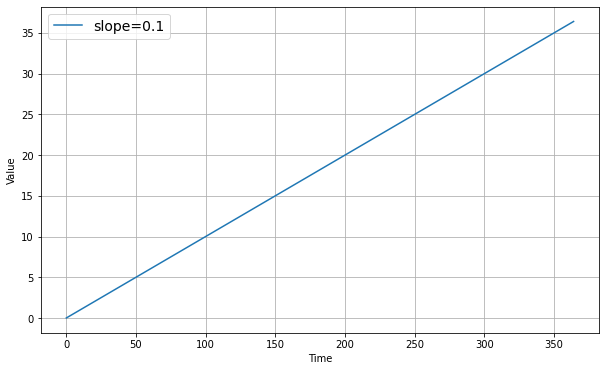

In [ ]:
# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(365)

# Define the slope (You can revise this)
slope = 0.1

# Generate measurements with the defined slope
series = trend(time, slope)

# Plot the results
plot_series(time, series, label=[f'slope={slope}'])


###Seasonality

Another attribute we may want to look for is seasonality. This refers to a recurring pattern at regular time intervals. For instance, the hourly temperature might oscillate similarly for 10 consecutive days and we can use that to predict the behavior on the next day.

We can use the functions below to generate a time series with a seasonal pattern:

In [ ]:
def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

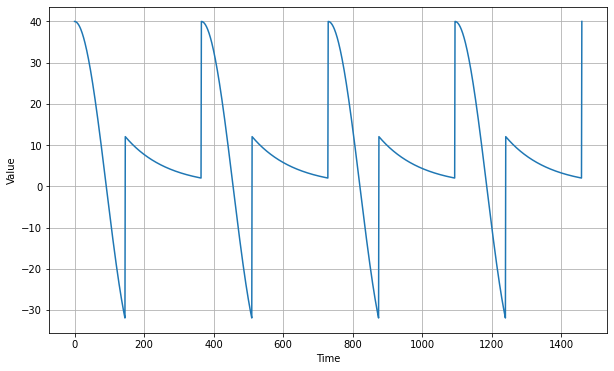

In [ ]:
# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

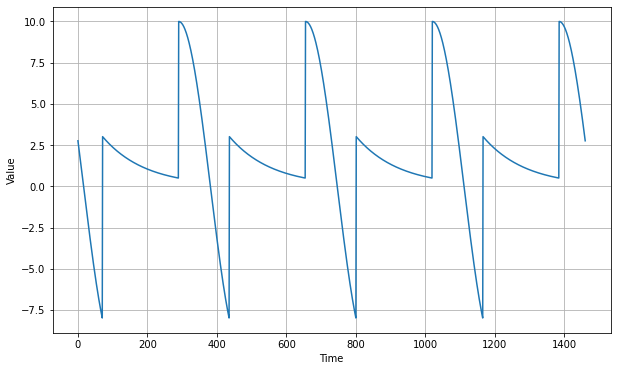

In [ ]:
# Generate the seasonal data
series = seasonality(time, period=period, amplitude=10, phase=75)

# Plot the results
plot_series(time, series)

A time series can also contain both trend and seasonality. For example, the hourly temperature might oscillate regularly in short time frames, but it might show an upward trend if we look at multi-year data.

The example below demonstrates a seasonal pattern with an upward trend:



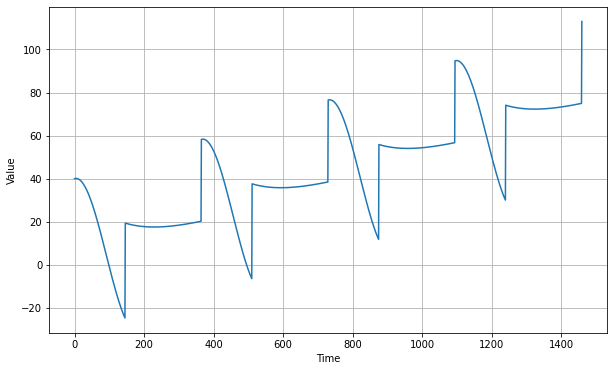

In [ ]:
# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

###Noise
A few real-life time series have such a smooth signal. They usually have some noise riding over that signal. The next cells will show what a noisy signal looks like:



In [ ]:
def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal

    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

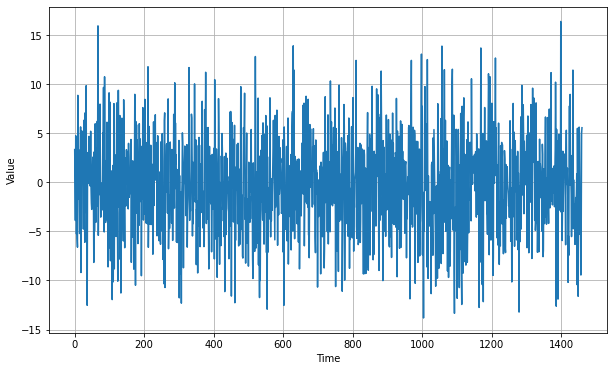

In [ ]:
# Define noise level
noise_level = 5

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=23)

# Plot the results
plot_series(time, noise_signal)

Added to the time series generated earlier

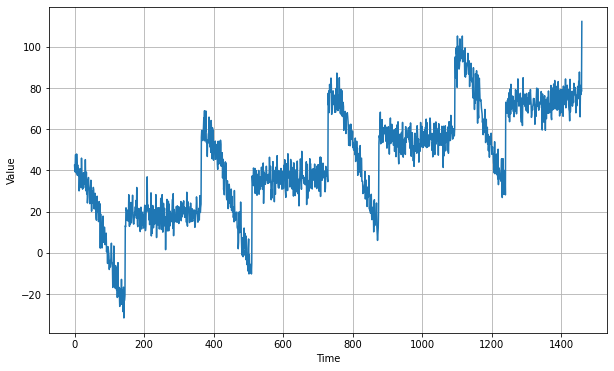

In [ ]:
# Add the noise to the time series
series += noise_signal

# Plot the results
plot_series(time, series)

###Autocorrelation

Time series can also be autocorrelated. This means that measurements at a given time step is a function of previous time steps. Here are some functions that demonstrate that. Notice lines that refer to the step variable because this is where the computation from previous time steps happen. It will also include noise (i.e. random numbers) to make the result a bit more realistic.



In [ ]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)
    
    # Initialize array of random numbers equal to the length 
    # of the given time steps plus 50
    ar = rnd.randn(len(time) + 50)
    
    # Set first 50 elements to a constant
    ar[:50] = 100
    
    # Define scaling factors
    phi1 = 0.5
    phi2 = -0.1

    # Autocorrelate element 51 onwards with the measurement at 
    # (t-50) and (t-30), where t is the current time step
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]
    
    # Get the autocorrelated data and scale with the given amplitude.
    # The first 50 elements of the original array is truncated because
    # those are just constant and not autocorrelated.
    ar = ar[50:] * amplitude

    return ar

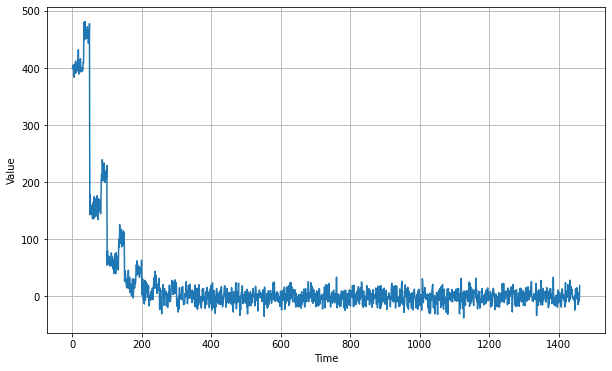

In [ ]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=23)

# Plot the pattern
plot_series(time, series)

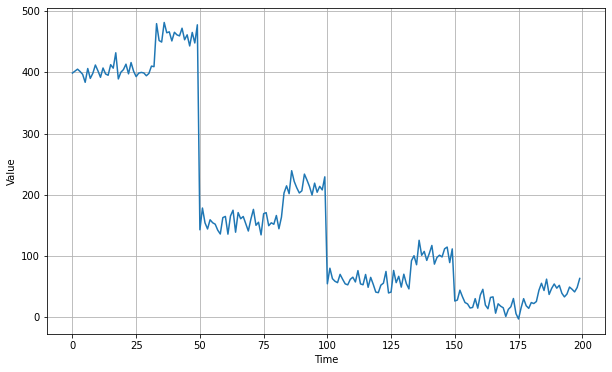

In [ ]:
# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:200], series[:200])

Here is a more straightforward autocorrelation function which just computes a value from the previous time step.


In [ ]:

def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length 
    # of the given time steps plus an additional step
    ar = rnd.randn(len(time) + 1)

    # Define scaling factor
    phi = 0.8

    # Autocorrelate element 11 onwards with the measurement at 
    # (t-1), where t is the current time step
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]
    
    # Get the autocorrelated data and scale with the given amplitude.
    ar = ar[1:] * amplitude
    
    return ar


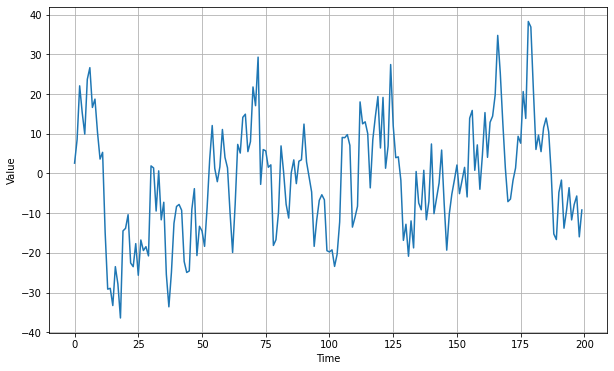

In [ ]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

Another autocorrelated time series you might encounter is one where it decays predictably after random spikes. We will first define the function that generates these spikes below.


In [ ]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    """
    Generates random impulses

    Args:
      time (array of int) - contains the time steps
      num_impulses (int) - number of impulses to generate
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      series (array of float) - array containing the impulses
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Generate random numbers
    impulse_indices = rnd.randint(len(time), size=num_impulses)

    # Initialize series
    series = np.zeros(len(time))

    # Insert random impulses
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude

    return series    


In [ ]:
rnd = np.random.RandomState(23)

rnd.randint(10, size=5)

array([3, 6, 8, 9, 6])

We will use the function above to generate a series with 10 random impulses.



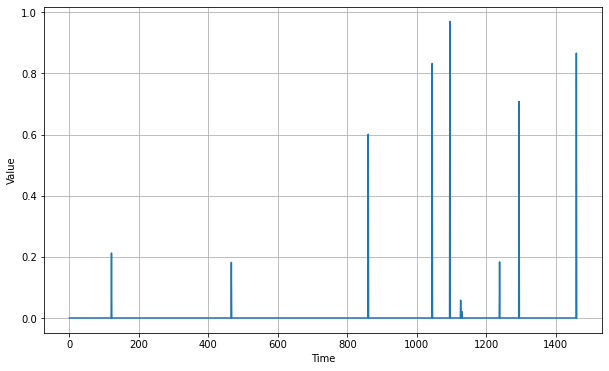

In [ ]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

Now that we have the series, qw will next define the function that will decay the next values after it spikes.


In [ ]:

def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

We can then use the function to generate the decay after the spikes. Here is one example that generates the next value from the previous time step (i.e. t-1, where t is the current time step):



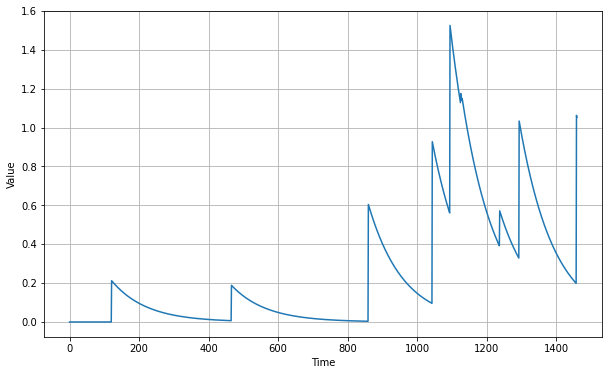

In [ ]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

Here is another example where the next values are computed from those in t-1 and t-50:

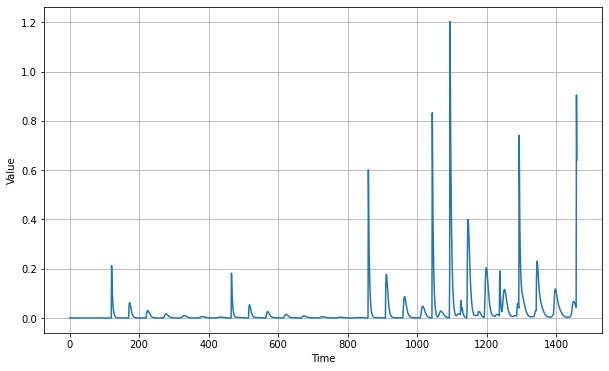

In [ ]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})

# Plot the results
plot_series(time, series)

Autocorrelated data can also ride a trend line and it will look like below.

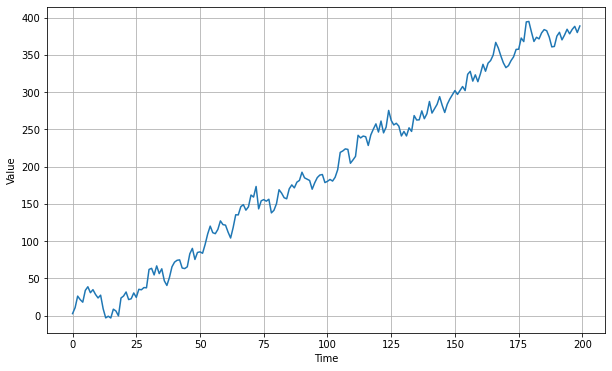

In [ ]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

Similarly, seasonality can also be added to this data.

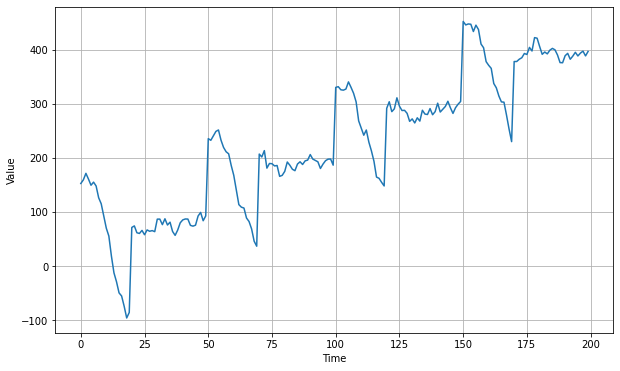

In [ ]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

###Non-stationary Time Series
It is also possible for the time series to break an expected pattern. Big events can alter the trend or seasonal behavior of the data. It would look something like below where the graph shifted to a downward trend at time step = 200.



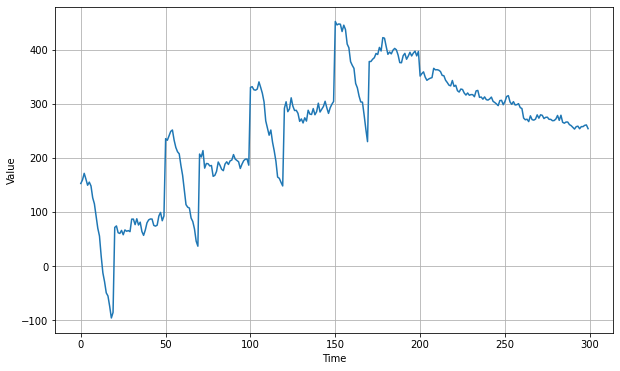

In [ ]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])

##Statistical Forecasting on Synthetic Data
Here, we will be doing some statistical forecasting

###Imports
We will first import the packages we will need to execute all the code in this lab.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

###Generate the synthetic data
We can then use the utility functions earlier defined to generate the synthetic data. This will start at a baseline then trend upwards with a seasonal pattern every 365 steps. We will also add some noise because real world data is often noisy as well.



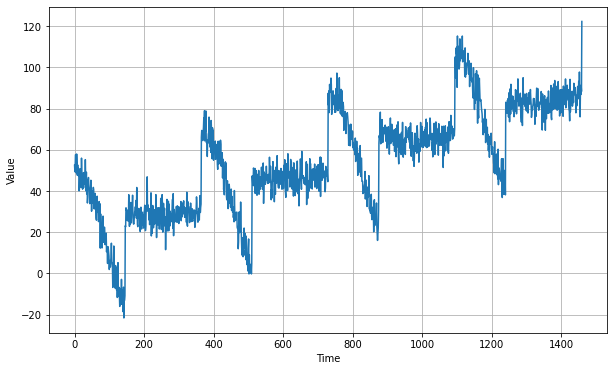

In [ ]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

###Split the Dataset
Next up, we will split the data above into training and validation sets. We will take the first 1,000 points for training while the rest is for validation.



In [ ]:
# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]


We can inspect these sets visually by using the same utility function for plotting. 

Notice that in general, the validation set has higher values (i.e. y-axis) than those in the training set. Our model should be able to predict those values just by learning from the trend and seasonality of the training set.



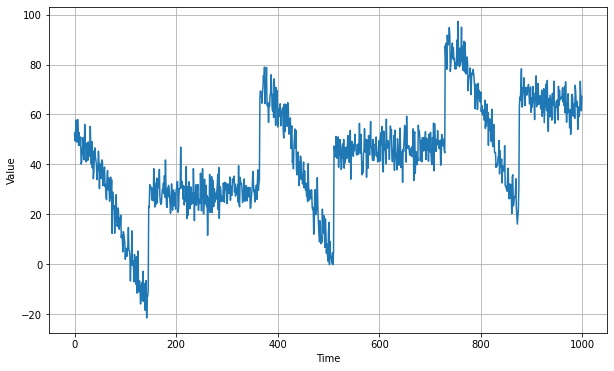

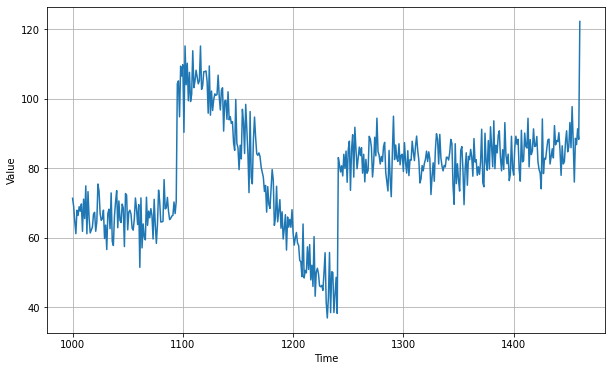

In [ ]:
# Plot the train set
plot_series(time_train, x_train)
# Plot the validation set
plot_series(time_valid, x_valid)

###Naive Forecast
As a baseline, we can do a naive forecast where we assume that the next value will be the same as the previous time step. You can slice the original series like below and print some values as a sanity check. The next time step value should be identical to the ground truth at the previous time step.


In [ ]:
# Generate the naive forecast
naive_forecast = series[split_time - 1:-1]

# Define time step
time_step = 100

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')


ground truth at time step 100: 109.84197998046875
prediction at time step 101: 109.84197998046875


####We can see this visually with the plot_series() function we defined earlier.


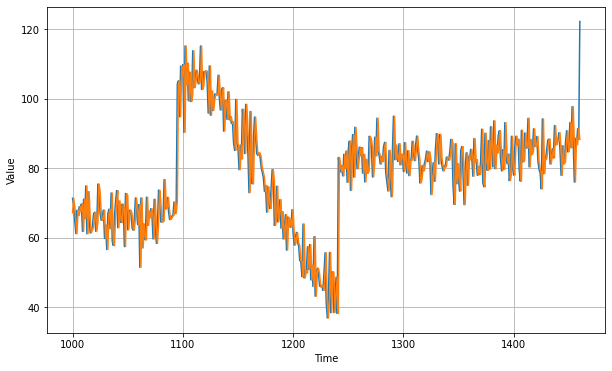

In [ ]:
# Plot the results
plot_series(time_valid, (x_valid, naive_forecast))


We can zoom in at the start of the validation period to see that the naive forecast lags 1 step behind the time series.



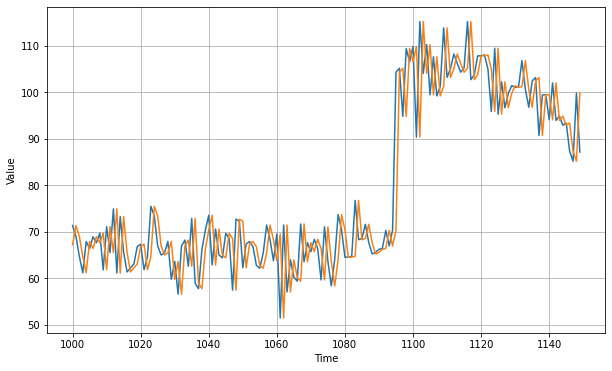

In [ ]:
# Zooming in
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

###Computing Metrics
Now we will compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period. These are available via the tf.keras.metrics API.
naive_forecast).numpy())

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.937908


###Moving Average
One technique we can use is to do a moving average. This sums up a series of time steps and the average will be the prediction for the next time step. For example, the average of the measurements at time steps 1 to 10 will be the forecast for time step 11, then the average for time steps 2 to 11 will be the forecast for time step 12, and so on.

The function below does the moving average for the entire series. It takes a window_size argument to indicate the number of time steps to consider when computing the mean.

In [ ]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []
    
    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())
    
    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

We will use this function to generate the forecast with a window size of 30.


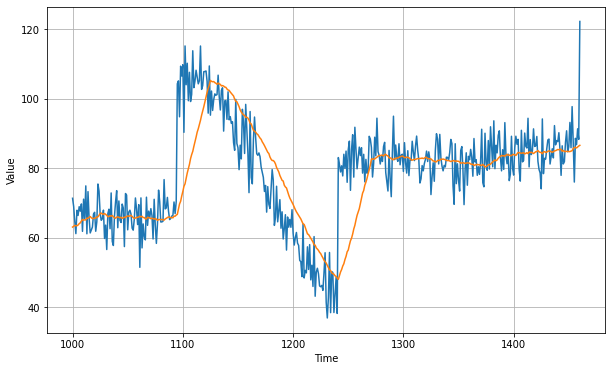

In [ ]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))


In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419


That's worse than naive forecast! The moving average does not anticipate trend or seasonality. In particular, those huge spikes in the original series causes big deviations as shown in the plot above. We will try to remove these characteristics of the dataset with time differencing and see if we get better results.

###Differencing
Since the seasonality period is 365 days, we will subtract the value at time t – 365 from the value at time t. That is done with the code below.

In addition, we will need to align the result with the time array. Since we can only do time differencing for t >= 365, you will need to truncate the first 365 time steps of the time array.

You can plot the result to visualize the values.



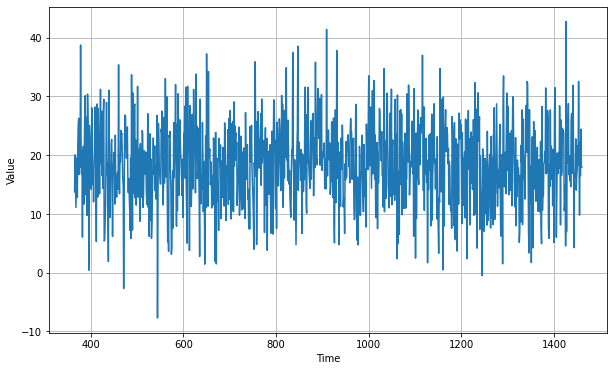

In [ ]:
# Subtract the values at t-365 from original series
diff_series = (series[365:] - series[:-365])

# Truncate the first 365 time steps
diff_time = time[365:]

# Plot the results
plot_series(diff_time, diff_series)

Great! The trend and seasonality seem to be gone so now we can retry using the moving average. diff_series is the ground truth while diff_moving_avg is the prediction array. We will slice these accordingly to correspond to the validation set time steps before comparing.



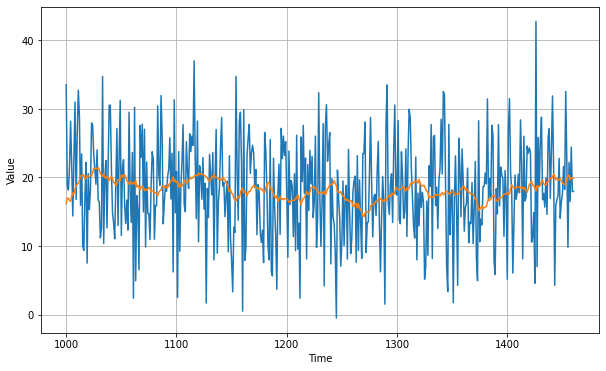

In [ ]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 30)

# Slice the prediction points that corresponds to the validation set time steps
diff_moving_avg = diff_moving_avg[split_time - 365 - 30:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 365:]

# Plot the results
plot_series(time_valid, (diff_series, diff_moving_avg))

Now we will bring back the trend and seasonality by adding the past values from t – 365:



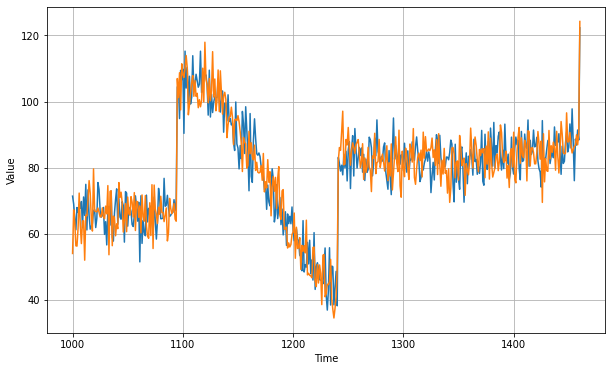

53.764587
5.9032416


In [ ]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())


It is a bit better than naive forecast. However, the forecasts look a bit too random because we're adding past values which are already noisy. Remember that the time differenced signal is also noisy so adding these raw past values can compound this problem. To remedy that, we can use a moving averaging on past values to smooth out some of this noise.

###Smoothing
We can use the same moving_average_forecast() function to smooth out past values before adding them back to the time differenced moving average. There are two ways to do this:

* **Trailing windows** - This refers to getting the mean of past values to smooth out the value at the current time step. For example, getting the average of t=0 to t=6 to get the smoothed data point at t=6.

* **Centered windows** - This refers to getting the mean of past and future values to smooth out the value at the current time step. For example, getting the average of t=0 to t=6 to get the smoothed data point at t=3.

The code below will use the centered windows approach and we will notice it in the slicing of the series array. It is shifted by 370 steps and the window size is 11. To get the smooth data point at t=1000 (i.e. start of the validation set), it will average the measurements at t=995 to t=1005.



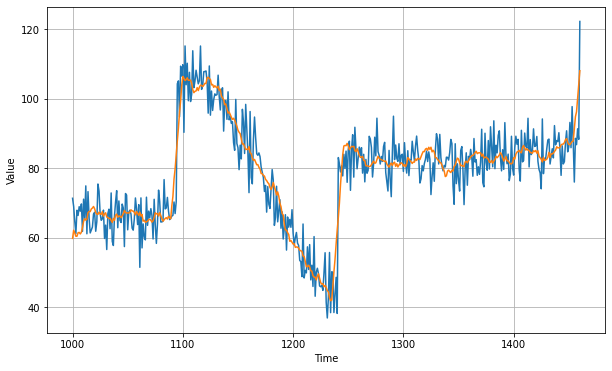

In [ ]:
# Smooth the original series before adding the time differenced moving average
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-359], 11) + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))


The metrics will show a big improvement over the previous output.


In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())


34.315723
4.6053295


##Preparing Time Series Features and Labels
Here, we will prepare time series data into features and labels that we can use to train a model. This is mainly achieved by a windowing technique where in we group consecutive measurement values into one feature and the next measurement will be the label. For example, in hourly measurements, we can use values taken at hours 1 to 11 to predict the value at hour 12. 

###Imports
Tensorflow will be our lone import in this module and we'll be using methods mainly from the tf.data API, particularly the tf.data.Dataset class. This contains many useful methods to arrange sequences of data.


In [ ]:
import tensorflow as tf

###Create a Simple Dataset
For this exercise, we will just use a sequence of numbers as your dataset so we can clearly see the effect of each command. For example, the cell below uses the range() method to generate a dataset containing numbers 0 to 9.



In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Preview the result
for val in dataset:
   print(val.numpy())

0
1
2
3
4
5
6
7
8
9


###Windowing the data
As mentioned earlier, we want to group consecutive elements of our data and use that to predict a future value. This is called windowing and we can use that with the window() method as shown below. Here, we will take 5 elements per window (i.e. size parameter) and we will move this window 1 element at a time (i.e. shift parameter). One caveat to using this method is that each window returned is a Dataset in itself.


In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data
dataset = dataset.window(size=5, shift=1)

# Print the result
for window_dataset in dataset:
  print(window_dataset)


<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


If we want to see the elements, we will have to iterate over each iterable. This can be done by modifying the print statement above with a nested for-loop or list comprehension. 



In [ ]:
# Print the result
for window_dataset in dataset:
  print([item.numpy() for item in window_dataset])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]
[6, 7, 8, 9]
[7, 8, 9]
[8, 9]
[9]


Now that we can see the elements of each window, we notice that the resulting sets are not sized evenly because there are no more elements after the number 9. We can use the drop_remainder flag to make sure that only 5-element windows are retained.


In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(size=5, shift=1, drop_remainder=True)

# Print the result
for window_dataset in dataset:
  print([item.numpy() for item in window_dataset])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


###Flatten the Windows
In training the model later, we will want to prepare the windows to be tensors instead of the Dataset structure. We can do that by feeding a mapping function to the flat_map() method. This function will be applied to each window and the results will be flattened into a single dataset. To illustrate, the code below will put all elements of a window into a single batch then flatten the result.



In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Print the results
for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


###Group into features and labels
Next, we will want to mark the labels in each window. Here, we will do that by splitting the last element of each window from the first four. This is done with the map() method containing a lambda function that defines the window slicing.



In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [0 1 2 3]
y =  4

x =  [1 2 3 4]
y =  5

x =  [2 3 4 5]
y =  6

x =  [3 4 5 6]
y =  7

x =  [4 5 6 7]
y =  8

x =  [5 6 7 8]
y =  9



###Shuffle the data

It is good practice to shuffle our dataset to reduce sequence bias while training our model. This refers to the neural network overfitting to the order of inputs and consequently, it will not perform well when it does not see that particular order when testing. We don't want the sequence of training inputs to impact the network this way so it's good to shuffle them up.

We can simply use the shuffle() method to do this. The buffer_size parameter is required for that and as mentioned in the doc, we should put a number equal or greater than the total number of elements for better shuffling.


In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Shuffle the windows
dataset = dataset.shuffle(buffer_size=10)

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())

x =  [3 4 5 6]
y =  7
x =  [0 1 2 3]
y =  4
x =  [5 6 7 8]
y =  9
x =  [2 3 4 5]
y =  6
x =  [1 2 3 4]
y =  5
x =  [4 5 6 7]
y =  8


###Create batches for training

Lastly, we want to group our windows into batches. We can do that with the batch() method as shown below. Simply specify the batch size and it will return a batched dataset with that number of windows. As a rule of thumb, it is also good to specify a prefetch() step. This optimizes the execution time when the model is already training. By specifying a prefetch buffer_size of 1 as shown below, Tensorflow will prepare the next one batch in advance (i.e. putting it in a buffer) while the current batch is being consumed by the model.



In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Shuffle the windows
dataset = dataset.shuffle(buffer_size=10)

# Create batches of windows
dataset = dataset.batch(2).prefetch(1)

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [[5 6 7 8]
 [3 4 5 6]]
y =  [9 7]

x =  [[1 2 3 4]
 [2 3 4 5]]
y =  [5 6]

x =  [[0 1 2 3]
 [4 5 6 7]]
y =  [4 8]



##Training a Single Layer Neural Network with Time Series Data

Using earlier synthetic data

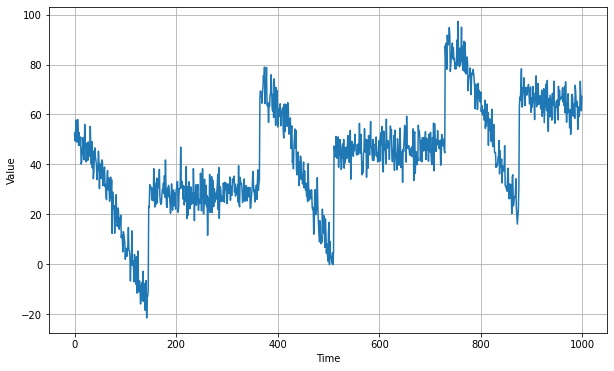

In [ ]:
# Plot the train set
plot_series(time_train, x_train)

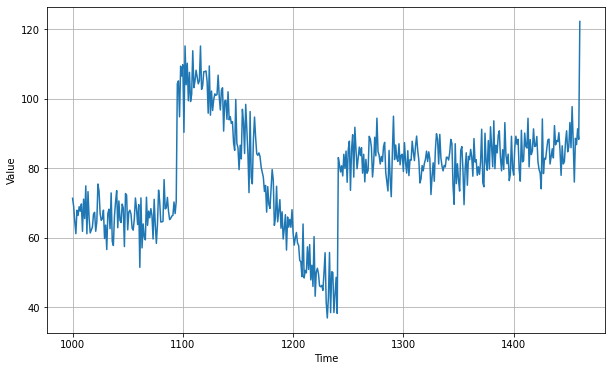

In [ ]:
# Plot the validation set
plot_series(time_valid, x_valid)

### Prepare features and labels

Prepare the data windows. It is good to declare parameters in a separate cell so you can easily tweak it later if you want.

In [ ]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

Following function contains all the preprocessing steps

One thing to note here is the `window_size + 1` when we call `dataset.window()`. There is a `+ 1` to indicate that we're taking the next point as the label. For example, the first 20 points will be the feature so the 21st point will be the label.

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

Now we can generate the dataset windows from the train set.

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

We can again inspect the output to see if the function is behaving as expected. The code below will use the [`take()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) method of the `tf.data.Dataset` API to grab a single batch. It will then print several properties of this batch such as the data type and shape of the elements. As expected, it should have a 2-element tuple (i.e. `(feature, label)`) and the shapes of these should align with the batch and window sizes we declared earlier which are `32` and `20` by default, respectively.

In [ ]:
# Print properties of a single batch
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


### Build and compile the model

Next, we will build the single layer neural network. This will just be a one-unit [Dense](https://keras.io/api/layers/core_layers/dense/) layer as shown below. We will assign the layer to a variable `l0` so we can also look at the final weights later using the [`get_weights()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#get_weights) method.

In [ ]:
# Build the single layer neural network
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

# Print the model summary
model.summary()

Layer weights: 
 [array([[ 0.50979036],
       [-0.29736948],
       [ 0.15215147],
       [-0.524694  ],
       [ 0.19213122],
       [-0.09275725],
       [ 0.46673864],
       [ 0.4303425 ],
       [-0.1973142 ],
       [ 0.03789622],
       [ 0.41050124],
       [-0.38699478],
       [-0.45204872],
       [ 0.05388612],
       [-0.28429934],
       [-0.15044862],
       [ 0.12981814],
       [-0.2479955 ],
       [-0.43189585],
       [-0.15045601]], dtype=float32), array([0.], dtype=float32)] 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


We will set [*mean squared error (mse)*](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError) as the loss function and use [*stochastic gradient descent (SGD)*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) to optimize the weights during training.

In [ ]:
# Set the training parameters
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

### Train the Model

Now we can proceed to train our model. We will feed in the prepared data windows and run the training for 100 epochs.

In [ ]:
# Train the model
model.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 3ms/step - loss: 1664.0553
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 281.9224
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 181.1608
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 143.5515
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 123.5606
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 109.6023
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 101.7165
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 96.5537
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 91.4963
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 88.0998
Epoch 11/100
31/31 [==============================] - 0s 1ms/step - loss: 85.1966
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 83.3028
Epoch 13/100
31/3

We can see the final weights by calling the `get_weights()` method.

In [ ]:
# Print the layer weights
print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[ 0.04004243],
       [-0.07928289],
       [ 0.08061314],
       [-0.1076549 ],
       [ 0.06357253],
       [-0.03869822],
       [ 0.05884002],
       [ 0.03779181],
       [-0.06779719],
       [ 0.00715847],
       [ 0.08362029],
       [-0.06289527],
       [-0.08367338],
       [ 0.0745852 ],
       [ 0.00704123],
       [ 0.05321783],
       [ 0.08858768],
       [ 0.15380612],
       [ 0.22847614],
       [ 0.46678346]], dtype=float32), array([0.01660655], dtype=float32)]


### Model Prediction

With the training finished, we can now measure the performance of our model. We can generate a model prediction by passing a batch of data windows. If we will be slicing a window from the original `series` array, we will need to add a batch dimension before passing it to the model. That can be done by indexing with the [`np.newaxis`](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) constant or using the [`np.expand_dims()`](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) method.

In [ ]:
# Shape of the first 20 data points slice
print(f'shape of series[0:20]: {series[0:20].shape}')

# Shape after adding a batch dimension
print(f'shape of series[0:20][np.newaxis]: {series[0:20][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way)
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:20], axis=0).shape}')

# Sample model prediction
print(f'model prediction: {model.predict(series[0:20][np.newaxis])}')

shape of series[0:20]: (20,)
shape of series[0:20][np.newaxis]: (1, 20)
shape of series[0:20][np.newaxis]: (1, 20)
1/1 [==============================] - 0s 79ms/step
model prediction: [[43.960213]]


To compute the metrics, we will want to generate model predictions for our validation set. This set refers to points at index `1000` to `1460` of the entire series. We will need to code the steps to generate those from our model. The cell below demonstrates one way of doing that. 

Basically, it feeds the entire series to our model 20 points at a time and append all results to a `forecast` list. It will then slice the points that corresponds to the validation set. 

The slice index below is `split_time - window_size:` because the forecast list is smaller than the series by 20 points (i.e. the window size). Since the window size is 20, the first data point in the `forecast` list corresponds to the prediction for time at index `20`. We cannot make predictions at index `0` to `19` because those are smaller than the window size. Thus, when we slice with `split_time - window_size:`, we will be getting the points at the time indices that aligns with those in the validation set.


In [ ]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

1/1 [==============================] - 0s 19ms/step
length of the forecast list: 461
shape of the validation set: (461,)


To visualize the results, we will need to convert the predictions to a form that the `plot_series()` utility function accepts. That involves converting the list to a numpy array and dropping the single dimensional axes.

shape after converting to numpy array: (461, 1, 1)
shape after squeezing: (461,)


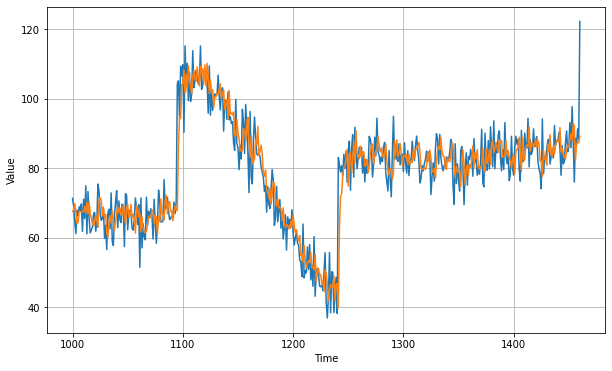

In [ ]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

You can compute the metrics by calling the same functions as before. You will get an MAE close to 5.

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

44.7479
4.9873686


##Training a Deep Neural Network with Time Series Data

### Build the Model

We will use three dense layers here. As expected, the number of trainable parameters will increase and the model summary shows that it is more than tenfold of the previous model.

In [ ]:
# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


### Train the Model

We will then compile and train the model using the same settings as before. 

In [ ]:
# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [ ]:
# Train the model
model_baseline.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 1708.6602
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 210.8705
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 143.6086
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 125.4194
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 109.2223
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 95.5048
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 85.4340
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 77.6491
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 72.1221
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 68.1849
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 65.6711
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 63.8519
Epoch 13/100
31/31 

We can then get some predictions and visualize it as before. Since the network is deeper, the predictions might go slower so we may want to minimize unnecessary computations. 

In the previous section, we remember the model generating predictions using the entire `series` data. That resulted in 1,441 points in the `forecast` list then we sliced the 461 points that aligns with the validation set using `forecast = forecast[split_time - window_size:]`. 

We can make this process faster by just generating 461 points right from the start. That way, we don't waste time predicting points that will just be thrown away later. The code below will do just that. It will just get the points needed from the original `series` before calling the `predict()` method. With that, all predictions will align with the validation set already and the for-loop will run for only 461 times instead of 1,441. 


1/1 [==============================] - 0s 26ms/step


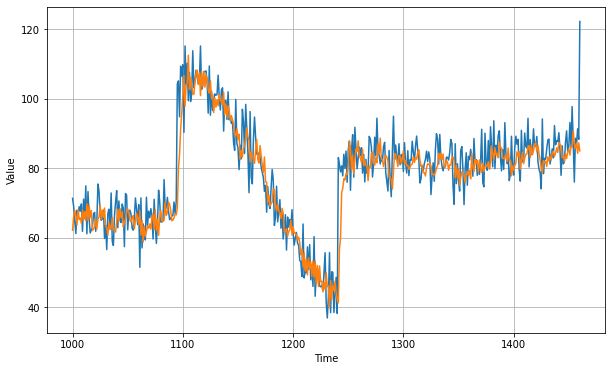

In [ ]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

You can then get the MSE and MAE for reference.

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

46.937572
4.9553394


### Tune the learning rate

We saw that the training went well with the initial learning rate that we chose (i.e. `1e-6`). However, we're not yet sure if it is the best setting for this particular model. It might seem inconsequential in this simple model but when we have more complex ones, spending some time to tune the learning rate can lead to better training results. we will see how to do that in this section.

First, you will build the same model architecture we just used.

In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

Next, we will declare a [learning rate scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler) callback. This will allow us to dynamically set the learning rate based on the epoch number during training. As shown below, we will pass a lambda function to declare the value of the learning rate. It will start at `1e-8` at epoch 0 and is scaled by `10**(epoch / 20)` as the training goes on.

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

We will then compile the model. We don't have to set the `learning_rate` argument of the optimizer here before compiling. We can just leave the default (i.e. [`0.01` for SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD#args)) and allow the learning rate scheduler to set it dynamically.

In [ ]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

We will pass in the `lr_schedule` callback in the `callbacks` parameter of the [`fit()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method. As we run the training below, we will see the learning rate at a particular epoch denoted by `lr` in the console output. Notice that it is increasing as expected based on the lambda function you used.

In [ ]:
# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 2106.6021 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 1486.0857 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 1081.4736 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 827.9276 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 620.5128 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 445.5668 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 307.6860 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 206.7117 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 142.9753 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 106.6044 - lr: 2.8184e-08
Epoch 

Next step is to plot the results of the training. We will visualize the loss at each value of the learning rate.

(1e-08, 0.001, 0.0, 300.0)

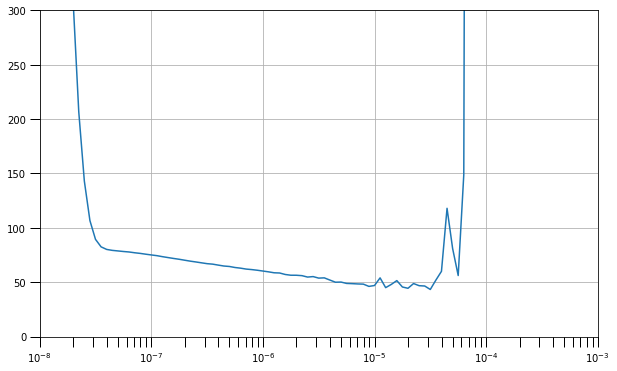

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 300])

The generated graph above shows the values of the range of learning rates that leads to lower losses (i.e. sloping downward) and also which ones cause the training to become unstable (i.e. jagged edges and pointing upwards). In general, we will want to pick a point in a downward slope. That means the network is still learning at that point and is stable. Choosing close to the minimum point of the graph will make the training converge to that loss value quicker, as will be shown in the next cells.

First, we will initialize the same model architecture again.

In [ ]:
# Build the model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

You will then set the optimizer with a learning rate close to the minimum. It is set to `4e-6` initially but feel free to change based on your results.

In [ ]:
# Set the optimizer with the tuned learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-6, momentum=0.9)

You can then compile and train the model as before. Observe the loss values and compare it to the output of the baseline model you had before. Most likely, you will have met the final loss value of the `model_baseline` within the first 50 epochs of training this `model_tune`. You will also likely have a lower loss after all 100 epochs are done.

In [ ]:
# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100)

Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 831.7213
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 107.5127
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 97.3240
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 93.0298
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 88.8957
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 84.9723
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 80.7206
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 78.8154
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 75.2012
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 72.7203
Epoch 11/100
31/31 [==============================] - 0s 1ms/step - loss: 72.5769
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 68.6845
Epoch 13/100
31/31 [===

We can plot the `loss` values by getting it from the [History](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History) object returned by the `fit()` method. As we can see, the model is still trending downward after the training.

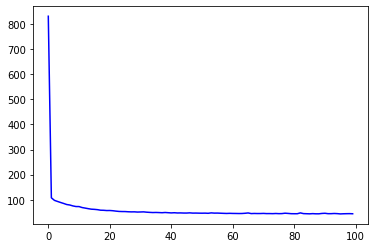

In [ ]:
# Plot the loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

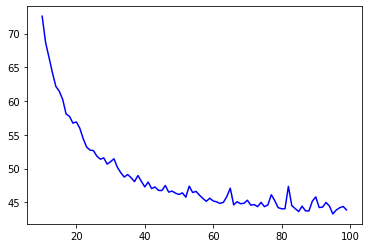

In [ ]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

We can get the predictions again and overlay it on the validation set.

1/1 [==============================] - 0s 25ms/step


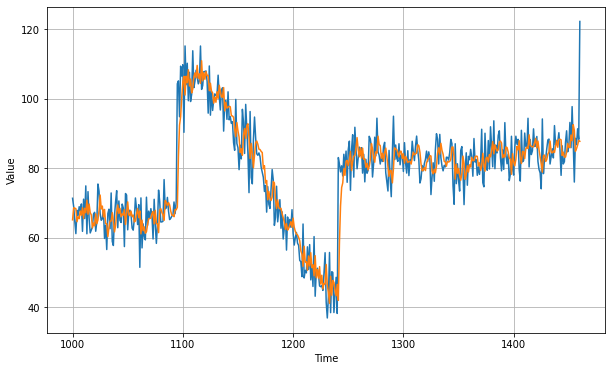

In [ ]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_tune.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

Finally, you can compute the metrics and you should arrive at similar figures compared to the baseline. If it is much worse, then the model might have overfitted and you can use techniques you know to avoid it (e.g. adding dropout).

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

44.614185
4.959501
